In [10]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1caf7c69a1e046cbb74de6812fc975d6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3Bwomte_QO1hWqYGiEOgj-2zC4jwZmPB16VmZTF7imyl',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1caf7c69a1e046cbb74de6812fc975d6.get_object(Bucket='machinelearningdicoding-donotdelete-pr-ypqn86qbi4dqfk',Key='Mall_Customers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head(3)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [12]:
# ubah nama kolom 
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                       'Annual Income (k$)': 'annual_income',
                       'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [16]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
x = df.drop(['CustomerID', 'gender'], axis=1)

# membuat list/array yang berisi inersia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

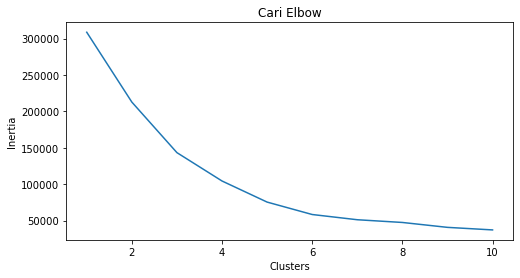

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat frame plot intersia dengan ukuran 8x4
fig, ax = plt.subplots(figsize=(8,4))

# membuat plot line dengan sumbu x bernilai 1-10 satuan, dan sumbu y adalah nilai
# yang diambil dari var array clusters yang berisi inertia
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)

ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

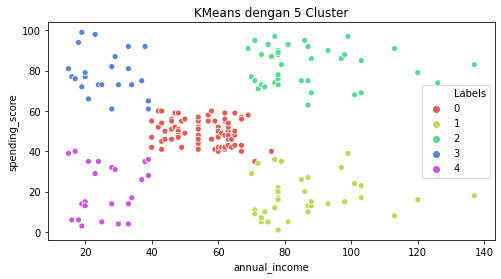

In [33]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)

# menambahkan kolom baru bernama label pada dataset
x['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster, dengan label dalam bentuk warna diambil 
# dari kolom Labels yang baru dibuat
plt.figure(figsize=(8,4))
sns.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'],
               palette = sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()